# Proyecto Costa Rica REDD+ Pagos Basados en Resultados para el período de resultados 2014-2015 (REDD+ PBR) 

## Distrubución de talleres participativos en territorios indígenas Costa Rica (2021-2022) 

In [29]:
#Descarga de paquetes para el análisis 
import pandas as pd

## Integración de matriz de asistencia 

In [3]:
datos_asistencia = pd.read_csv("asistencia_TI.csv", sep=";")

### Asistencia y media de edad en participantes 

<AxesSubplot: >

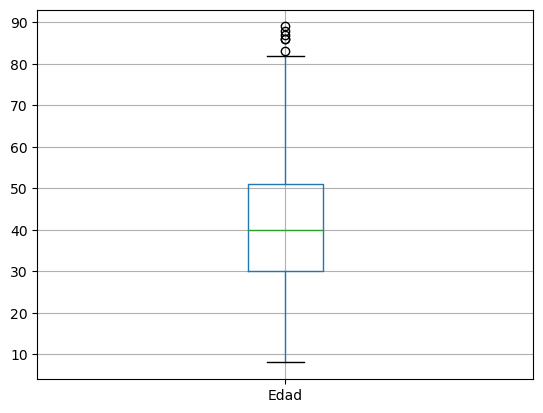

In [4]:
datos_asistencia.boxplot(column="Edad")

### Información contenida en matriz de datos 

In [6]:
datos_asistencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                937 non-null    object 
 1   Organizacion          780 non-null    object 
 2   Canton                942 non-null    object 
 3   cooredenada  X        942 non-null    float64
 4   coordenada Y          942 non-null    float64
 5   TI Indigena           942 non-null    object 
 6   Grupo mujeres         942 non-null    object 
 7   Fecha                 942 non-null    object 
 8   Hombre                505 non-null    object 
 9   Mujer                 431 non-null    object 
 10  Territorio Indigena   942 non-null    object 
 11  Correo electronico    349 non-null    object 
 12  Telefono              755 non-null    object 
 13  Edad                  872 non-null    float64
dtypes: float64(3), object(11)
memory usage: 103.2+ KB


#### Descarga de bibliotecas para la graficación 

In [7]:
import matplotlib.pyplot as plt # biblioteca de graficación
%matplotlib inline

import calendar 

In [8]:
# Estilo de los gráficos
plt.style.use('ggplot')

In [9]:
# Despliegue de las columnas con el nombre, la organización y la fecha de ejecución del taller

datos_asistencia[["Nombre", "Organizacion", "Fecha"]]

,Nombre,Organizacion,Fecha
0,Celimo Parra,Zapatón,21/10/2021
1,Roy Rojas Fernández,ADI Ujarrás,21/10/2021
2,Nelson Zúñiga Rojas,Ujarrás,21/10/2021
3,Vicente Aguirre Mendoza,Matambú,21/10/2021
4,Ronald Alemán García,ADI Matambú,21/10/2021
...,...,...,...
937,Claudina Morales,ADII Telire,21/1/2022
938,Silenia Morales,Telire,21/1/2022
939,Reimundo Morales Moya,Telire,21/1/2022
940,Maria Elena Herrera,Secretaría REDD+/FONAFIFO,21/1/2022


### Carga de módulos y cambios requeridos para el análisis

In [10]:
# Carga de módulos de matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Carga de seaborn
import seaborn as sns

# Carga de pandas
import pandas as pd

In [11]:
# Cambio del tipo de datos del campo de fecha
datos_asistencia["Fecha"] = pd.to_datetime(datos_asistencia["Fecha"], format="%d/%m/%Y")

In [12]:
datos_asistencia_registros_x_anio = datos_asistencia.groupby(datos_asistencia['Fecha'].dt.year).count().Fecha

datos_asistencia_registros_x_anio

Fecha
2021    211
2022    731
Name: Fecha, dtype: int64

In [13]:
# Tipo de datos retornado
type(datos_asistencia_registros_x_anio)

pandas.core.series.Series

In [14]:
# Conversión de series a dataframe
datos_asistencia_registros_x_anio_df = pd.DataFrame({'anio':datos_asistencia_registros_x_anio.index, 'registros':datos_asistencia_registros_x_anio.values}) 

# Conversión del tipo de la columna de año
datos_asistencia_registros_x_anio_df["anio"] = pd.to_numeric(datos_asistencia_registros_x_anio_df["anio"], downcast='integer')
datos_asistencia_registros_x_anio_df.style.set_precision(2)

datos_asistencia_registros_x_anio_df

C:\Users\steve\AppData\Local\Temp\ipykernel_11680\952843199.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  datos_asistencia_registros_x_anio_df.style.set_precision(2)


,anio,registros
0,2021,211
1,2022,731


### Gráfico registro de participantes en talleres por año

Text(0, 0.5, 'Cantidad de registros')

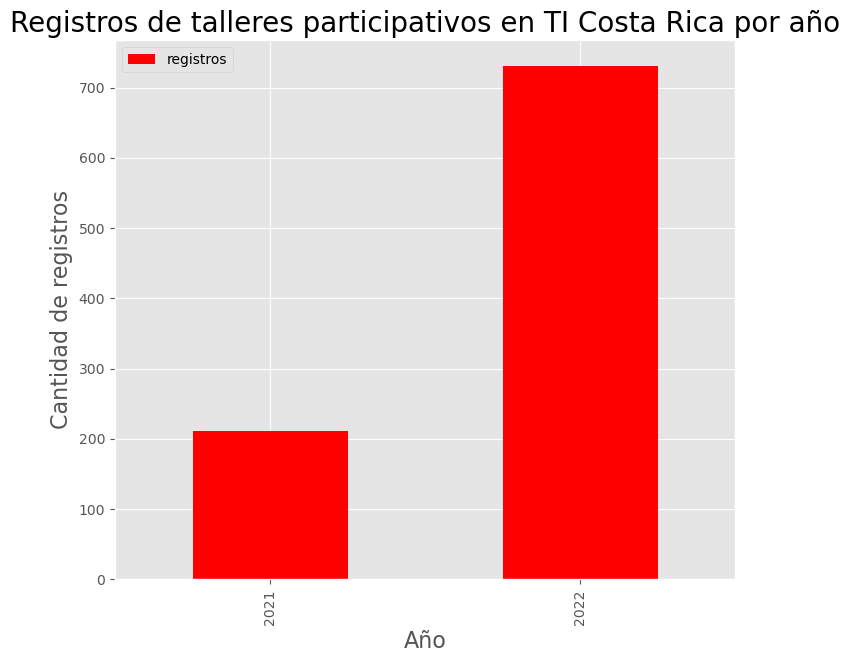

In [15]:
# Graficación de cantidad talleres participativos por años
datos_asistencia_registros_x_anio_df.plot(x='anio', y='registros', kind='bar', figsize=(8,7), color='red')

# Título y leyendas en los ejes
plt.title('Registros de talleres participativos en TI Costa Rica por año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16)

### Agrupación de registros mensualmente

In [16]:
# Agrupación de los registros por mes
datos_asistencia_registros_x_mes = datos_asistencia.groupby(datos_asistencia['Fecha'].dt.month).count().Fecha

datos_asistencia_registros_x_mes

Fecha
1      64
2     131
3     110
4     150
5     127
6     105
7      37
8      26
9      51
10    110
11     17
12     14
Name: Fecha, dtype: int64

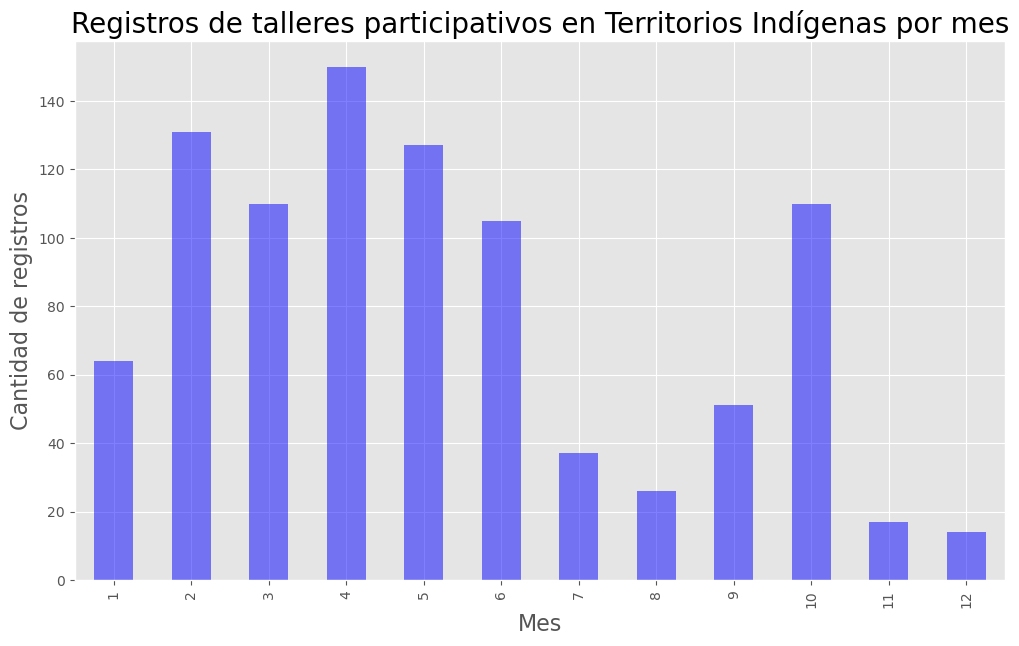

In [17]:
# Gráfico de barras fechas de cada taller mensual
datos_asistencia_registros_x_mes.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de talleres participativos en Territorios Indígenas por mes', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

### Registro de talleres por fecha 

In [18]:
# Agrupación de los registros por fecha
registros_x_fecha = datos_asistencia.groupby(datos_asistencia['Fecha'].dt.date).count().Fecha

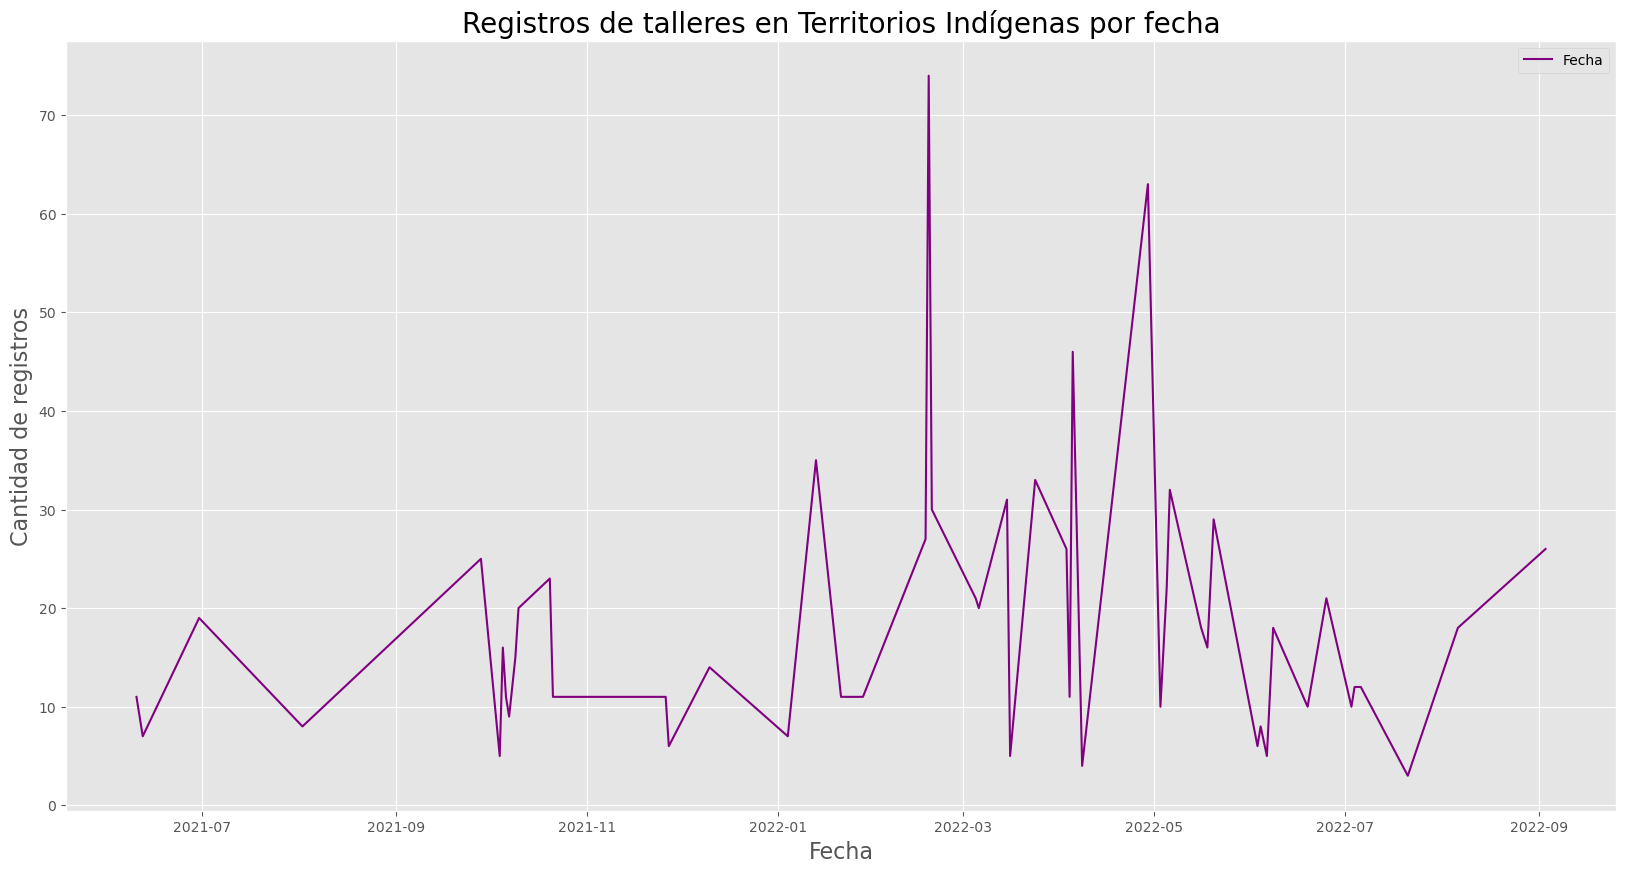

In [19]:
# Gráfico de líneas fecha de talleres periodo 2021-2022
registros_x_fecha.plot(figsize=(20,10), color='purple')

# Título y leyendas en los ejes
plt.title('Registros de talleres en Territorios Indígenas por fecha', fontsize=20)
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('Cantidad de registros',fontsize=16);
plt.legend()

In [20]:
import seaborn as sns

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Distribución de talleres a escala cantonal y vonculación con territorios indígenas

Text(0, 0.5, 'Cantidad')

C:\Users\steve\miniconda3\envs\geopython\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\steve\miniconda3\envs\geopython\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


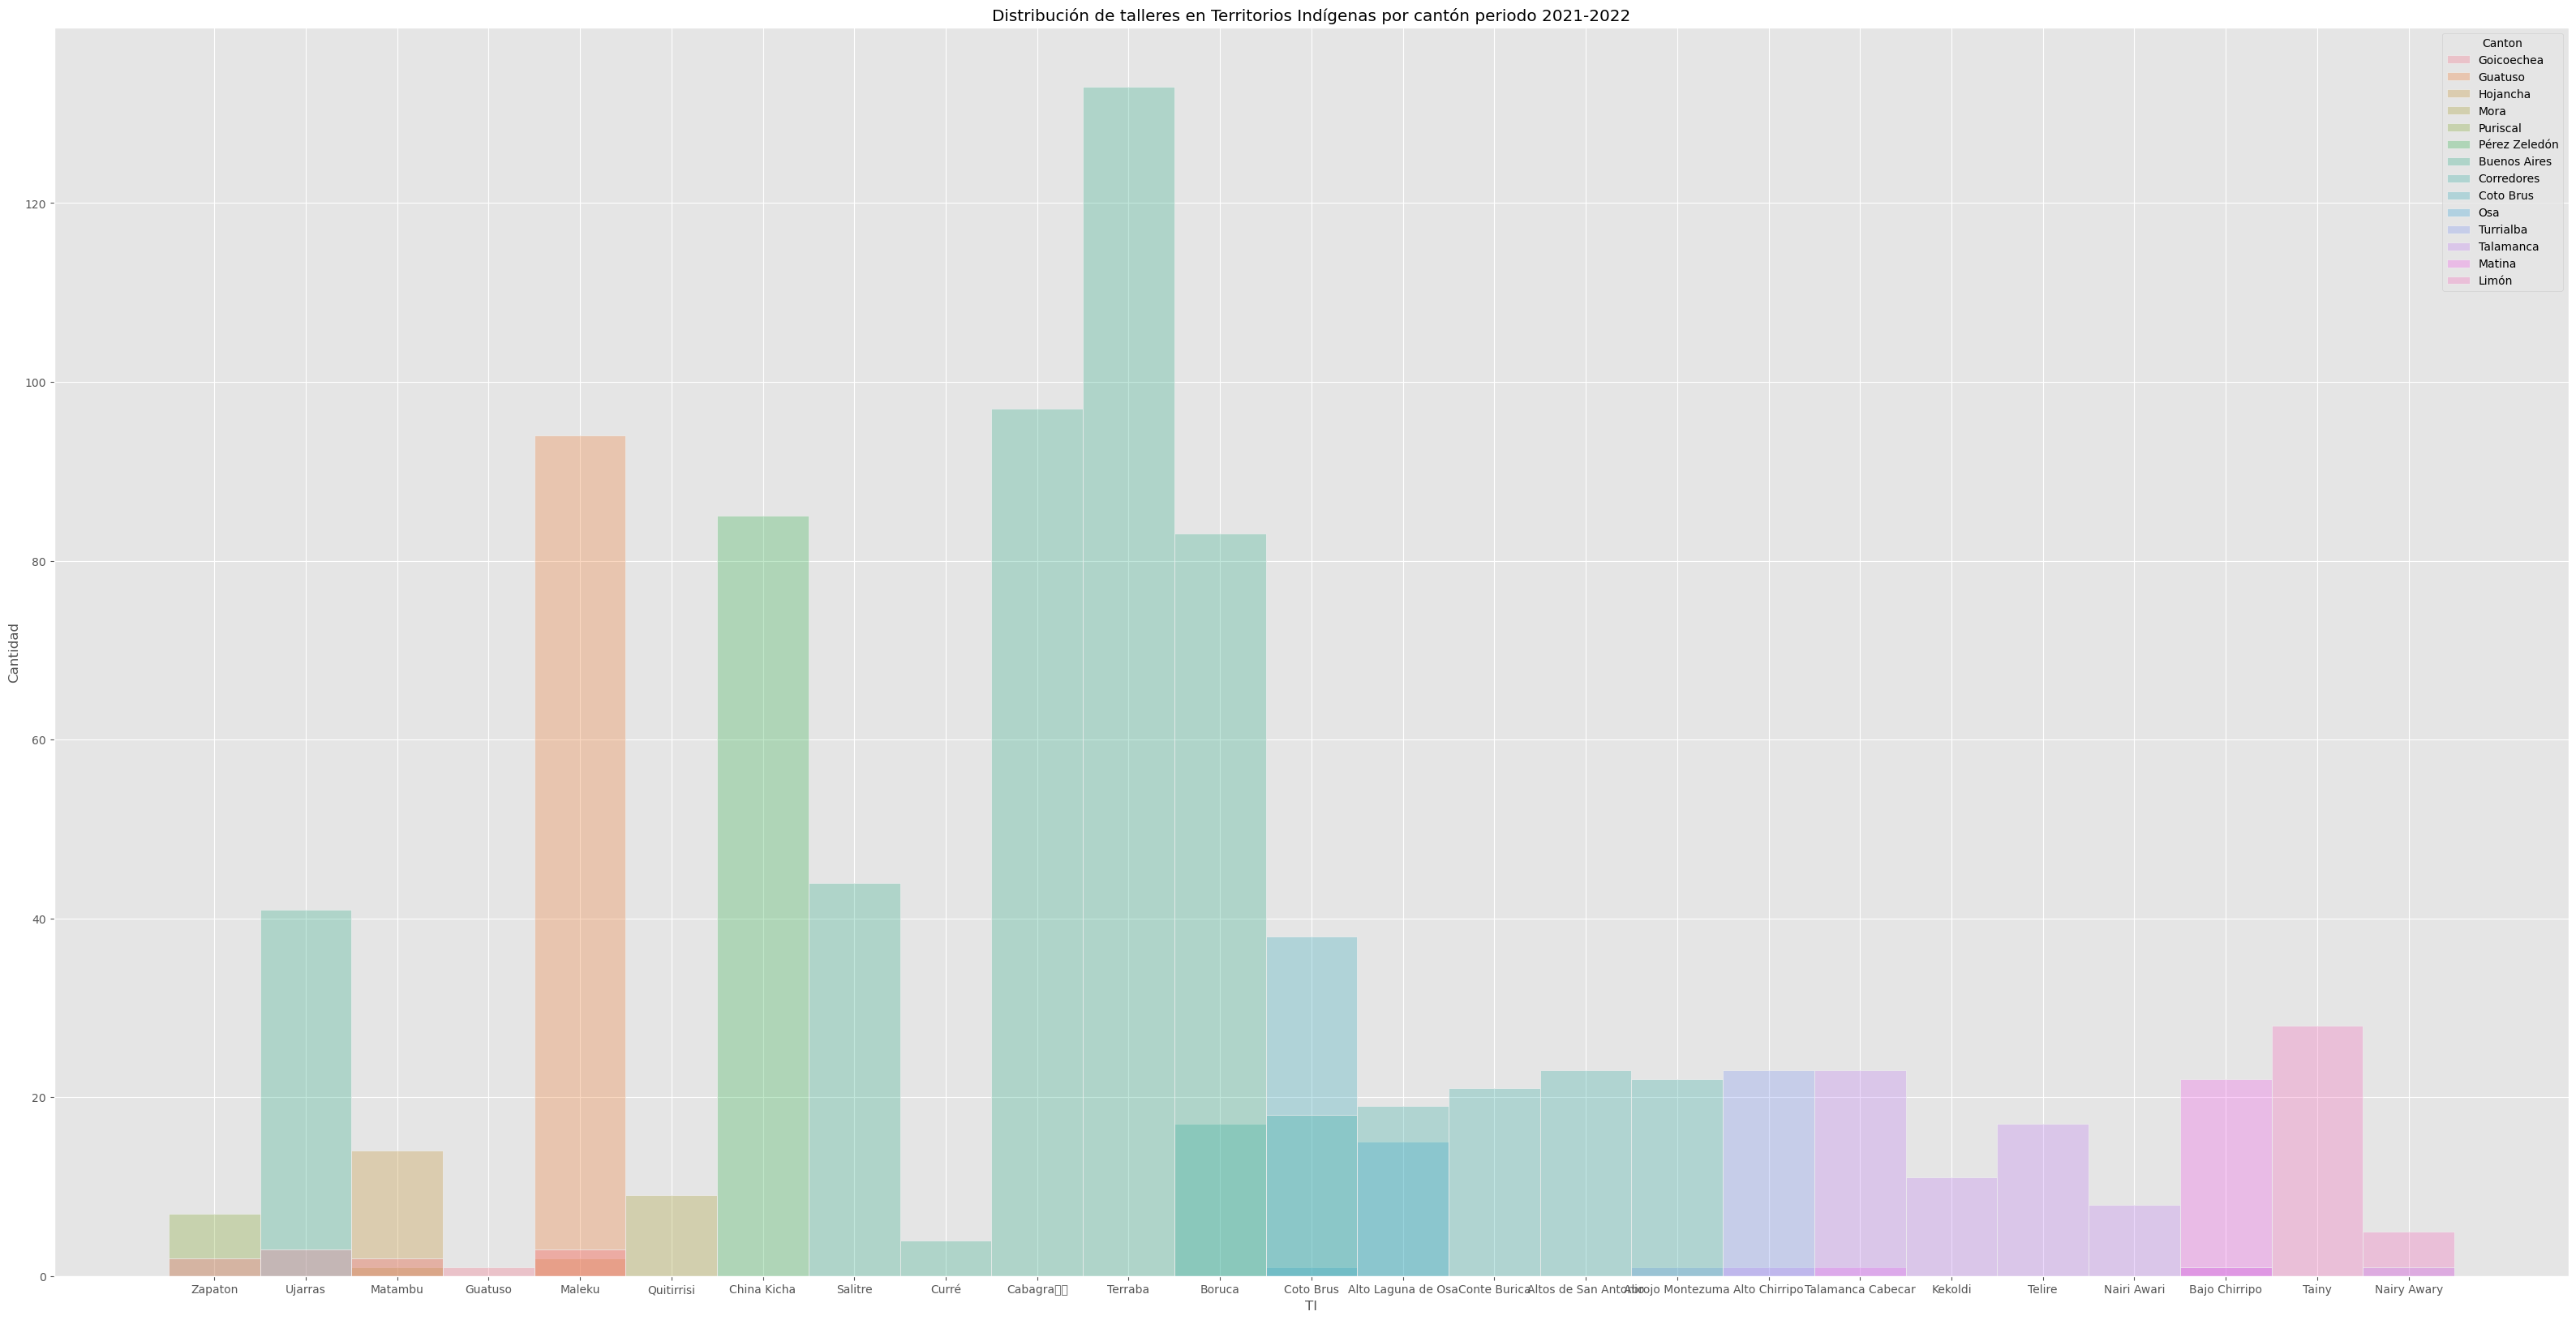

In [22]:
# Histograma con "bins" registros de talleres y TI divididos por canton 
sns.histplot(data=datos_asistencia, x="Territorio Indigena ", bins=8, hue="Canton", alpha=0.3, )

fig = plt.gcf()
fig.set_size_inches(40, 20)  # Establece el tamaño en pulgadas (ancho, alto)

# Título y etiquetas en los ejes
plt.title("Distribución de talleres en Territorios Indígenas por cantón periodo 2021-2022")
plt.xlabel("TI")
plt.ylabel("Cantidad")

In [23]:
import folium

In [24]:
folium.__version__

'0.14.0'

In [25]:
import pandas as pd

# Lectura del archivo
asistenciamap = pd.read_csv("asistencia_TI.csv", sep=";")

## Visualizar distribución de talleres participativos en mapas interactivos 

#### Taller y cantón donde fue desarrollado 

In [26]:
# Distribución de talleres a escala cantonal 
from folium import Marker

# Control de capas (clase LayerControl)

# Creación de un mapa
m = folium.Map(
    location=[10, -84], 
    width=650, height=400, 
    zoom_start=7, 
    control_scale=True)


# Adición de marcadores
for idx, row in asistenciamap.iterrows():
    Marker([row['coordenada Y'], row['cooredenada  X']], popup=row['Canton']).add_to(m)

# Despliegue del mapa visualizando el alcance de talleres a nivel cantonal en Costa Rica
m

In [27]:
# Cantidad de registros por Territorio Indígena 

import math
from folium.plugins import MarkerCluster

# Creación del mapa base
m = folium.Map(location=[9.6, -84.2], tiles='Stamen Terrain', zoom_start=8)

# Adición de puntos agrupados
mc = MarkerCluster()
for idx, row in asistenciamap.iterrows():
    if not math.isnan(row['coordenada Y']) and not math.isnan(row['cooredenada  X']):
        mc.add_child(Marker([row['coordenada Y'], row['cooredenada  X']], popup=row['Territorio Indigena ']))
m.add_child(mc)

# Despliegue del mapa visualizando los talleres en Territorios Indígenas registrados  
m

In [28]:
#Mapa de calor distriución de talleres participativos y de consulta en TI
from folium.plugins import HeatMap


# Creación del mapa base
m = folium.Map(location=[9.6, -84.2], tiles='CartoDB positron', zoom_start=8)

# Mapa de color
HeatMap(data=asistenciamap[['coordenada Y', 'cooredenada  X']], radius=10).add_to(m)

# Despliegue del mapa de calor respecto a la distribución de talleres en TI durante el periodo 2021-2022
m

##### Enlace página oficial REDD+ COSTA RICA

[REDD+ COSTA RICA](https://reddcostarica.net/)